### Fully Feedforward Neural Network

conda info --envs
source activate anaconda3/envs/venv 
#switch anaconda virtual machine environment

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

Using TensorFlow backend.


In [ ]:
#define the model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) 
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#train the model
model.fit(X,Y,epochs=150,batch_size=10)

### Twitter Sentiment Analysis

In [6]:
import keras
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

In [19]:
data=pd.read_csv("/Users/wty24/Desktop/2019SpringTerm/758B/Lab/lab1/train_validation.csv",delimiter=",",encoding='latin-1')
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [30]:
Text=data['SentimentText'].values
Label=data['Sentiment'].values

text_train,text_test,label_train,label_test=train_test_split(Text,Label,test_size=0.2)

vectorizer = CountVectorizer()
vectorizer.fit(Text) #use all words to create Bag Of Unique Words(Matrix)

X_train=vectorizer.transform(text_train)#create sparse matrix
X_test=vectorizer.transform(text_test)

input_col=X_train.shape[1]
y_train,y_test=label_train,label_test

In [32]:
#Fully Connected Neural Network

#define the model
#this Neural Network's structure is:
#1 input layer
#4 hidden layer,each with 500 neurons, using 'relu' as activation
#1 output layer, with 'sigmoid' activation
model = Sequential()
model.add(Dense(500, input_dim=input_col, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#train the model
model.fit(X_train,y_train,batch_size=20000,epochs=5)#this set will totally update 80000/20000*5 times paramets

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
80000/80000 [==============================] - 307s 4ms/step - loss: 0.6841 - acc: 0.5482
Epoch 2/5
80000/80000 [==============================] - 295s 4ms/step - loss: 0.6340 - acc: 0.5646
Epoch 3/5
80000/80000 [==============================] - 300s 4ms/step - loss: 0.5457 - acc: 0.7064
Epoch 4/5
80000/80000 [==============================] - 300s 4ms/step - loss: 0.4597 - acc: 0.8069
Epoch 5/5
80000/80000 [==============================] - 302s 4ms/step - loss: 0.3756 - acc: 0.8451


In [33]:
#evaluate the model
scores=model.evaluate(X_test,y_test)
print('Accuracy of testing data is:',scores[1])

20000/20000 [==============================] - 35s 2ms/step
Accuracy of testing data is: 0.76745


Loss function:
    1.mse
    2.cross entropy: log(1-(yi^-yi))#be used when yi range(0,1) 
How to update? gradient descent-->use back propapagation to calculate partial derivative

Mini-batch size
    When updating the parameter within each epoch, the data is shuffle in each mini batch
    
Activation:
    1.ReLU(x>0:x;x<0:0)--less neuron

Learning Rate:
    lr/[(t**1/2)+1]
    Adagrad: lr--f(l/w partial derivative)

Overfitting:
    1.create more data()
    2.regularzation:add penlty to large weights
    3.Dropout: each neuron has p%prob to be drop out
     the neural network structure for each batch training is changing

### CNN

In [10]:
# use different filters to detect different patterns
# the filter is the weights need to be learned(only 18 weights!)

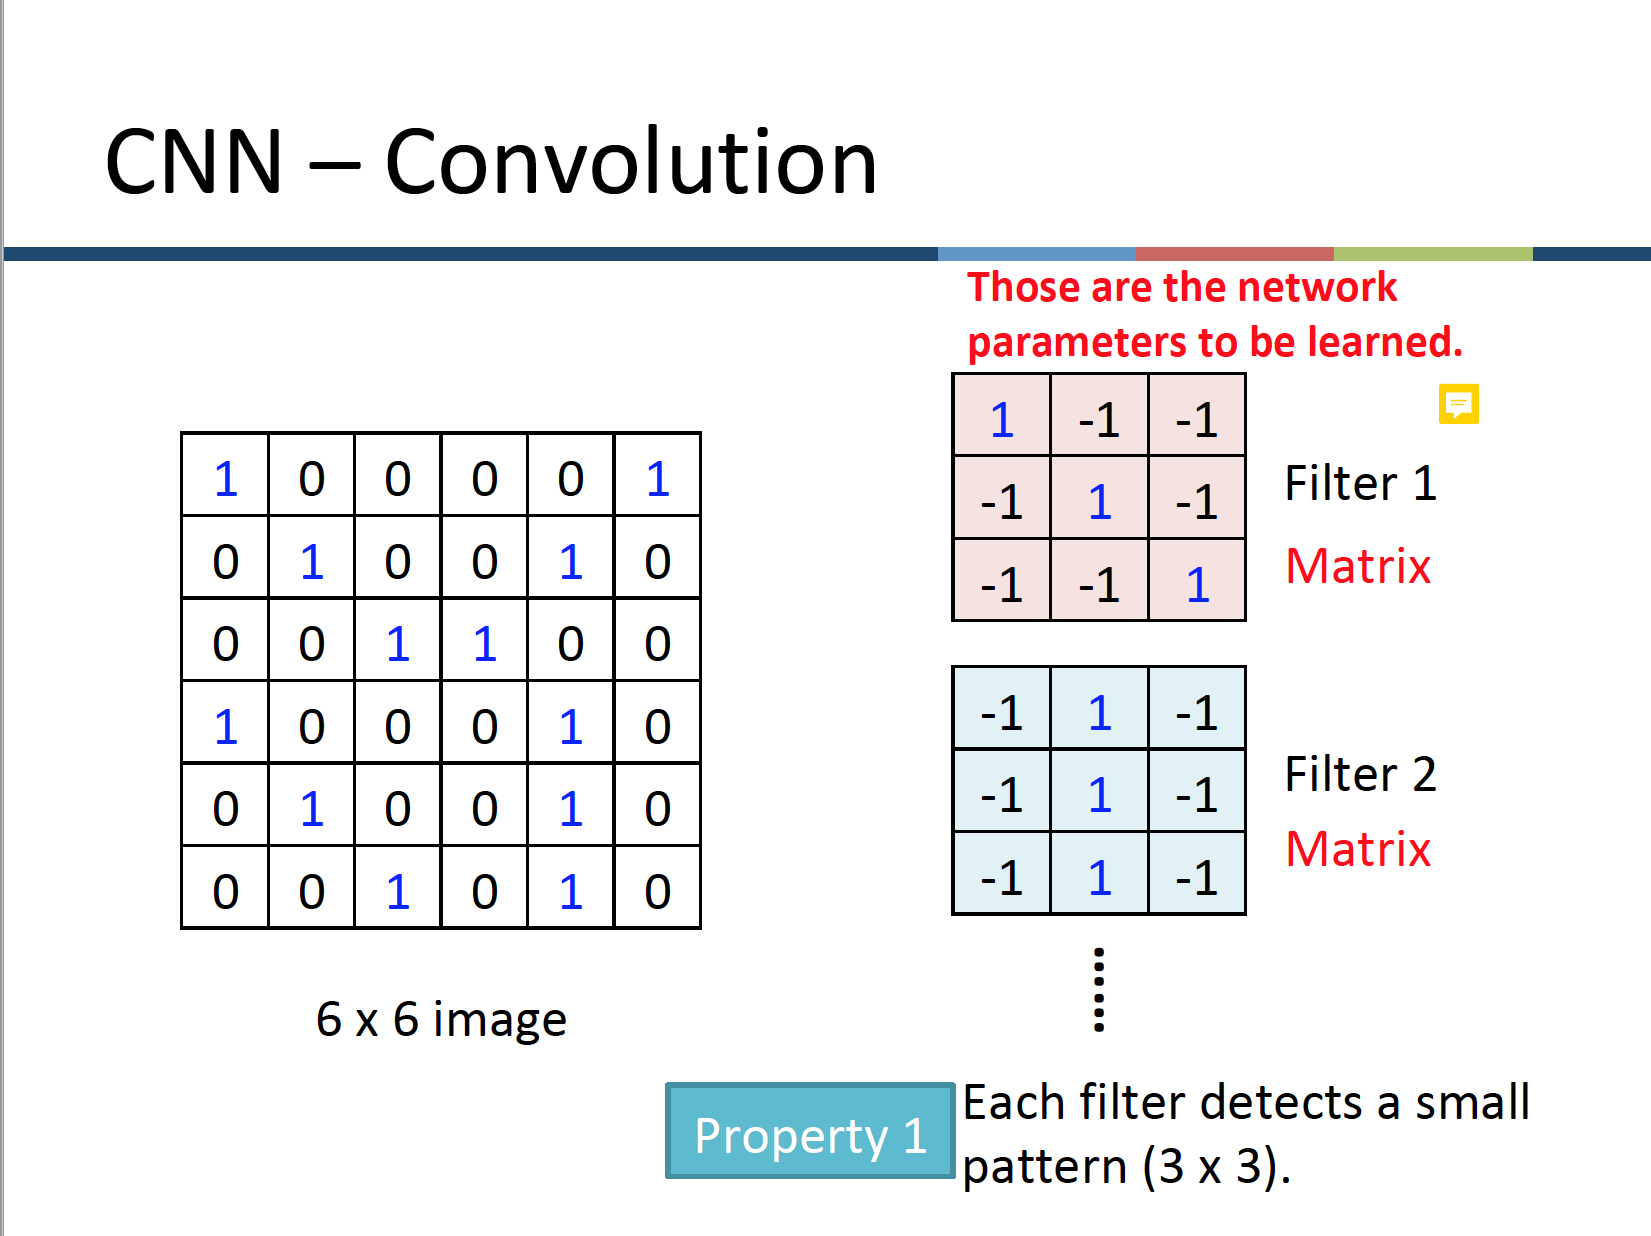

In [6]:
from IPython.display import Image
PATH = "/Users/wty24/Desktop/2020 Fulltime Data Scientist!/MLscreenShot/"
Image(filename = PATH + "CNN filter.png", width=600, height=300)
#material source: DataCamp

In [5]:
#zero padding

### Loss Function

In [12]:
#regression
#RMSE

In [23]:
#classification
#Binary Cross Entropy
#loss=−(ylog(p)+(1−y)log(1−p))

import numpy as np
predictions = np.array([[0.25,0.25,0.25,0.25],[0.01,0.01,0.01,0.96]])
targets = np.array([[0,0,0,1],[0,0,0,1]])

def cross_entropy(predicts,targets):
    return sum([-(targets[i]*np.log10(predicts[i])+(1-targets[i])*np.log10(1-predicts[i])) for i in range(len(predicts))])/len(predicts)

print(cross_entropy(predictions[0],targets[0]))
print(cross_entropy(predictions[1],targets[1]))

#reference:https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#hinge
#https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

0.24421905028821556
0.007705795791945467
